# Create Map Data

Convert shapefile vector data to GeoJSON format, then to npy

In [1]:
import os
import json
import shapefile
import matplotlib.pyplot as plt

import numpy as np

%matplotlib notebook

## Convert from Shapefile to GeoJSON
All data into a single MultiLineString or MultiPolygon feature

In [7]:
fname = "./data/vector/ne_110m_coastline/ne_110m_coastline.shp"

with shapefile.Reader(fname) as shp:
    geojson_data = shp.__geo_interface__

<IPython.core.display.Javascript object>


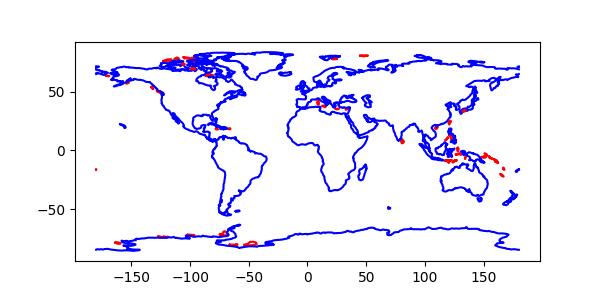

In [55]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

for i, feat in enumerate(geojson_data["features"]):
    if feat["properties"]["scalerank"] == 0:
        color = 'b'
    elif feat["properties"]["scalerank"] == 1:
        color = 'r'
    pts = np.array(feat["geometry"]["coordinates"])
    ax.plot(pts[:,0],pts[:,1], color=color)
    
ax.set_aspect("equal")
    
plt.show()

Find index of specific features using bounding box

In [43]:
xbound = (78,84)
ybound = (4,12)
for i, feat in enumerate(geojson_data["features"]):
    pts = np.array(feat["geometry"]["coordinates"])
    x = pts[:,0]
    y = pts[:,1]
    
    if np.all(x > xbound[0]) and np.all(x < xbound[1]) and np.all(y > ybound[0]) and np.all(y < ybound[1]):
        print(i)
        break

52


Use all scalerank = 0, plus some extra inds as defined using bounding boxes

In [ ]:
extra_inds = [52,65,66] # taiwan, hainan, bangladesh
keep_feats = []

for i, feat in enumerate(geojson_data["features"]):
    if feat["properties"]["scalerank"] == 0 or i in extra_inds:
        keep_feats.append(feat)
        
output_geojson = {"type": "FeatureCollection",
                  "features": [{"type": "Feature",
                                "properties": "coastline",
                                "geometry": {"type": "MultiLineString",
                                             "coordinates": [feat["geometry"]["coordinates"] for feat in keep_feats]
                                            }
                               }
                              ]
                 }

Write to geojson file

In [53]:
fname = "./data/vector/custom_coastline.geojson"

with open(fname, "w") as fout:
    json.dump(output_geojson, fout)

## Convert GeoJSON to Array in npy
Concatenate all linestrings into single N, 2 array with nans between lines

In [2]:
fname = "./data/vector/custom_coastline.geojson"

with open(fname, "r") as fin:
    data = json.load(fin)
    
pts = [data["features"][0]["geometry"]["coordinates"][0]]

for seg in data["features"][0]["geometry"]["coordinates"][1:]:
    pts.append([[np.nan, np.nan]])
    pts.append(seg)
    
pts = np.concatenate(pts)

<IPython.core.display.Javascript object>


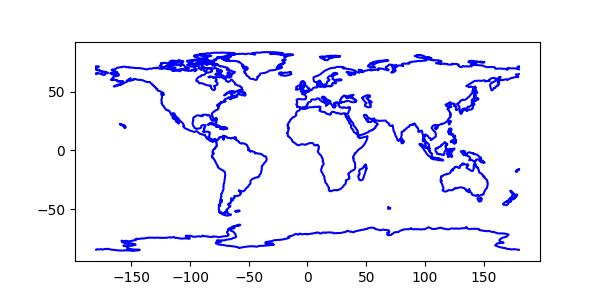

In [4]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

ax.plot(pts[:,0], pts[:,1],"b")
ax.set_aspect("equal")
    
plt.show()

Write to npy file

In [5]:
fname = "./data/vector/custom_coastline.npy"
np.save(fname, pts)